In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In /Users/mahdi/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/mahdi/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/mahdi/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
df = pd.read_csv('dataset/Whole_Slides_Segments_Processed/res_2.txt', sep='\s+', names=['Staining Protocol', 'size', 'bf50', 'be50', 'bf25', 'be25', 'rf50', 're50', 'rf25', 're25'], header=None, index_col=False)


In [3]:
df

,Staining Protocol,size,bf50,be50,bf25,be25,rf50,re50,rf25,re25
0,Boiling-2min,136,33.445313,40.541562,31.873551,42.522197,101.524227,95.168277,102.905883,93.477798
1,Boiling-2min,16,3.719643,5.035865,3.298754,4.865779,11.746967,10.964134,12.474522,11.134220
2,Boiling-2min,169,46.135926,63.636022,40.121919,68.534346,122.627195,105.363973,128.684591,100.465649
3,Boiling-2min,139,87.555637,93.181736,84.915181,96.786335,50.190035,44.561249,52.673378,41.353422
4,Boiling-2min,220,67.010174,80.784535,64.243286,87.332843,150.515231,137.583120,153.165239,132.366845
5,Boiling-2min,249,62.798488,70.460934,56.278325,70.386502,185.090763,177.213335,191.504037,177.479097
6,Boiling-2min,275,54.590074,66.540672,50.356767,71.594301,216.855211,207.859141,221.741578,203.405682
7,Boiling-5min,111,17.856616,22.879564,16.785905,25.439462,92.476245,87.898687,93.186587,85.560535
8,Boiling-5min,53,12.149264,13.491508,11.964756,13.406098,40.850730,39.508490,41.035234,39.593900
9,Boiling-5min,508,107.721736,123.739199,102.521586,126.655484,395.877715,383.071963,402.695663,380.904310


In [4]:
df.iloc[:, 1:] = df.iloc[:, 1:].div(df['size'].values, axis=0)

In [5]:
df

,Staining Protocol,size,bf50,be50,bf25,be25,rf50,re50,rf25,re25
0,Boiling-2min,1.0,0.245921,0.298100,0.234364,0.312663,0.746502,0.699767,0.756661,0.687337
1,Boiling-2min,1.0,0.232478,0.314742,0.206172,0.304111,0.734185,0.685258,0.779658,0.695889
2,Boiling-2min,1.0,0.272994,0.376545,0.237408,0.405529,0.725605,0.623455,0.761447,0.594471
3,Boiling-2min,1.0,0.629897,0.670372,0.610901,0.696305,0.361079,0.320585,0.378945,0.297507
4,Boiling-2min,1.0,0.304592,0.367202,0.292015,0.396967,0.684160,0.625378,0.696206,0.601667
5,Boiling-2min,1.0,0.252203,0.282976,0.226017,0.282677,0.743336,0.711700,0.769093,0.712767
6,Boiling-2min,1.0,0.198509,0.241966,0.183116,0.260343,0.788564,0.755851,0.806333,0.739657
7,Boiling-5min,1.0,0.160870,0.206122,0.151224,0.229184,0.833119,0.791880,0.839519,0.770816
8,Boiling-5min,1.0,0.229231,0.254557,0.225750,0.252945,0.770768,0.745443,0.774250,0.747055
9,Boiling-5min,1.0,0.212051,0.243581,0.201814,0.249322,0.779287,0.754079,0.792708,0.749812


In [6]:
df['Brown Intensity(25% top - 25% bottom)'] = df['rf25'] - df['re25']

In [7]:
df

,Staining Protocol,size,bf50,be50,bf25,be25,rf50,re50,rf25,re25,Brown Intensity(25% top - 25% bottom)
0,Boiling-2min,1.0,0.245921,0.298100,0.234364,0.312663,0.746502,0.699767,0.756661,0.687337,0.069324
1,Boiling-2min,1.0,0.232478,0.314742,0.206172,0.304111,0.734185,0.685258,0.779658,0.695889,0.083769
2,Boiling-2min,1.0,0.272994,0.376545,0.237408,0.405529,0.725605,0.623455,0.761447,0.594471,0.166976
3,Boiling-2min,1.0,0.629897,0.670372,0.610901,0.696305,0.361079,0.320585,0.378945,0.297507,0.081439
4,Boiling-2min,1.0,0.304592,0.367202,0.292015,0.396967,0.684160,0.625378,0.696206,0.601667,0.094538
5,Boiling-2min,1.0,0.252203,0.282976,0.226017,0.282677,0.743336,0.711700,0.769093,0.712767,0.056325
6,Boiling-2min,1.0,0.198509,0.241966,0.183116,0.260343,0.788564,0.755851,0.806333,0.739657,0.066676
7,Boiling-5min,1.0,0.160870,0.206122,0.151224,0.229184,0.833119,0.791880,0.839519,0.770816,0.068703
8,Boiling-5min,1.0,0.229231,0.254557,0.225750,0.252945,0.770768,0.745443,0.774250,0.747055,0.027195
9,Boiling-5min,1.0,0.212051,0.243581,0.201814,0.249322,0.779287,0.754079,0.792708,0.749812,0.042896


       score       category
0   0.069324   Boiling-2min
1   0.083769   Boiling-2min
2   0.166976   Boiling-2min
3   0.081439   Boiling-2min
4   0.094538   Boiling-2min
5   0.056325   Boiling-2min
6   0.066676   Boiling-2min
7   0.068703   Boiling-5min
8   0.027195   Boiling-5min
9   0.042896   Boiling-5min
10  0.035032   Boiling-5min
11  0.024559   Boiling-5min
12 -0.022316  Boiling-15min
13  0.022934  Boiling-15min
14 -0.005839  Boiling-15min
15  0.017463  Boiling-15min
16 -0.013208  Boiling-15min
17 -0.039339  Pressure-3min
18 -0.006470  Pressure-3min
19  0.006865  Pressure-3min
20 -0.005417  Pressure-3min
21  0.014849  Pressure-3min
Plot saved as plots/violin_plot.svg
[0.0002454116508291421, 0.005949043036432166, 0.6661304412593498]


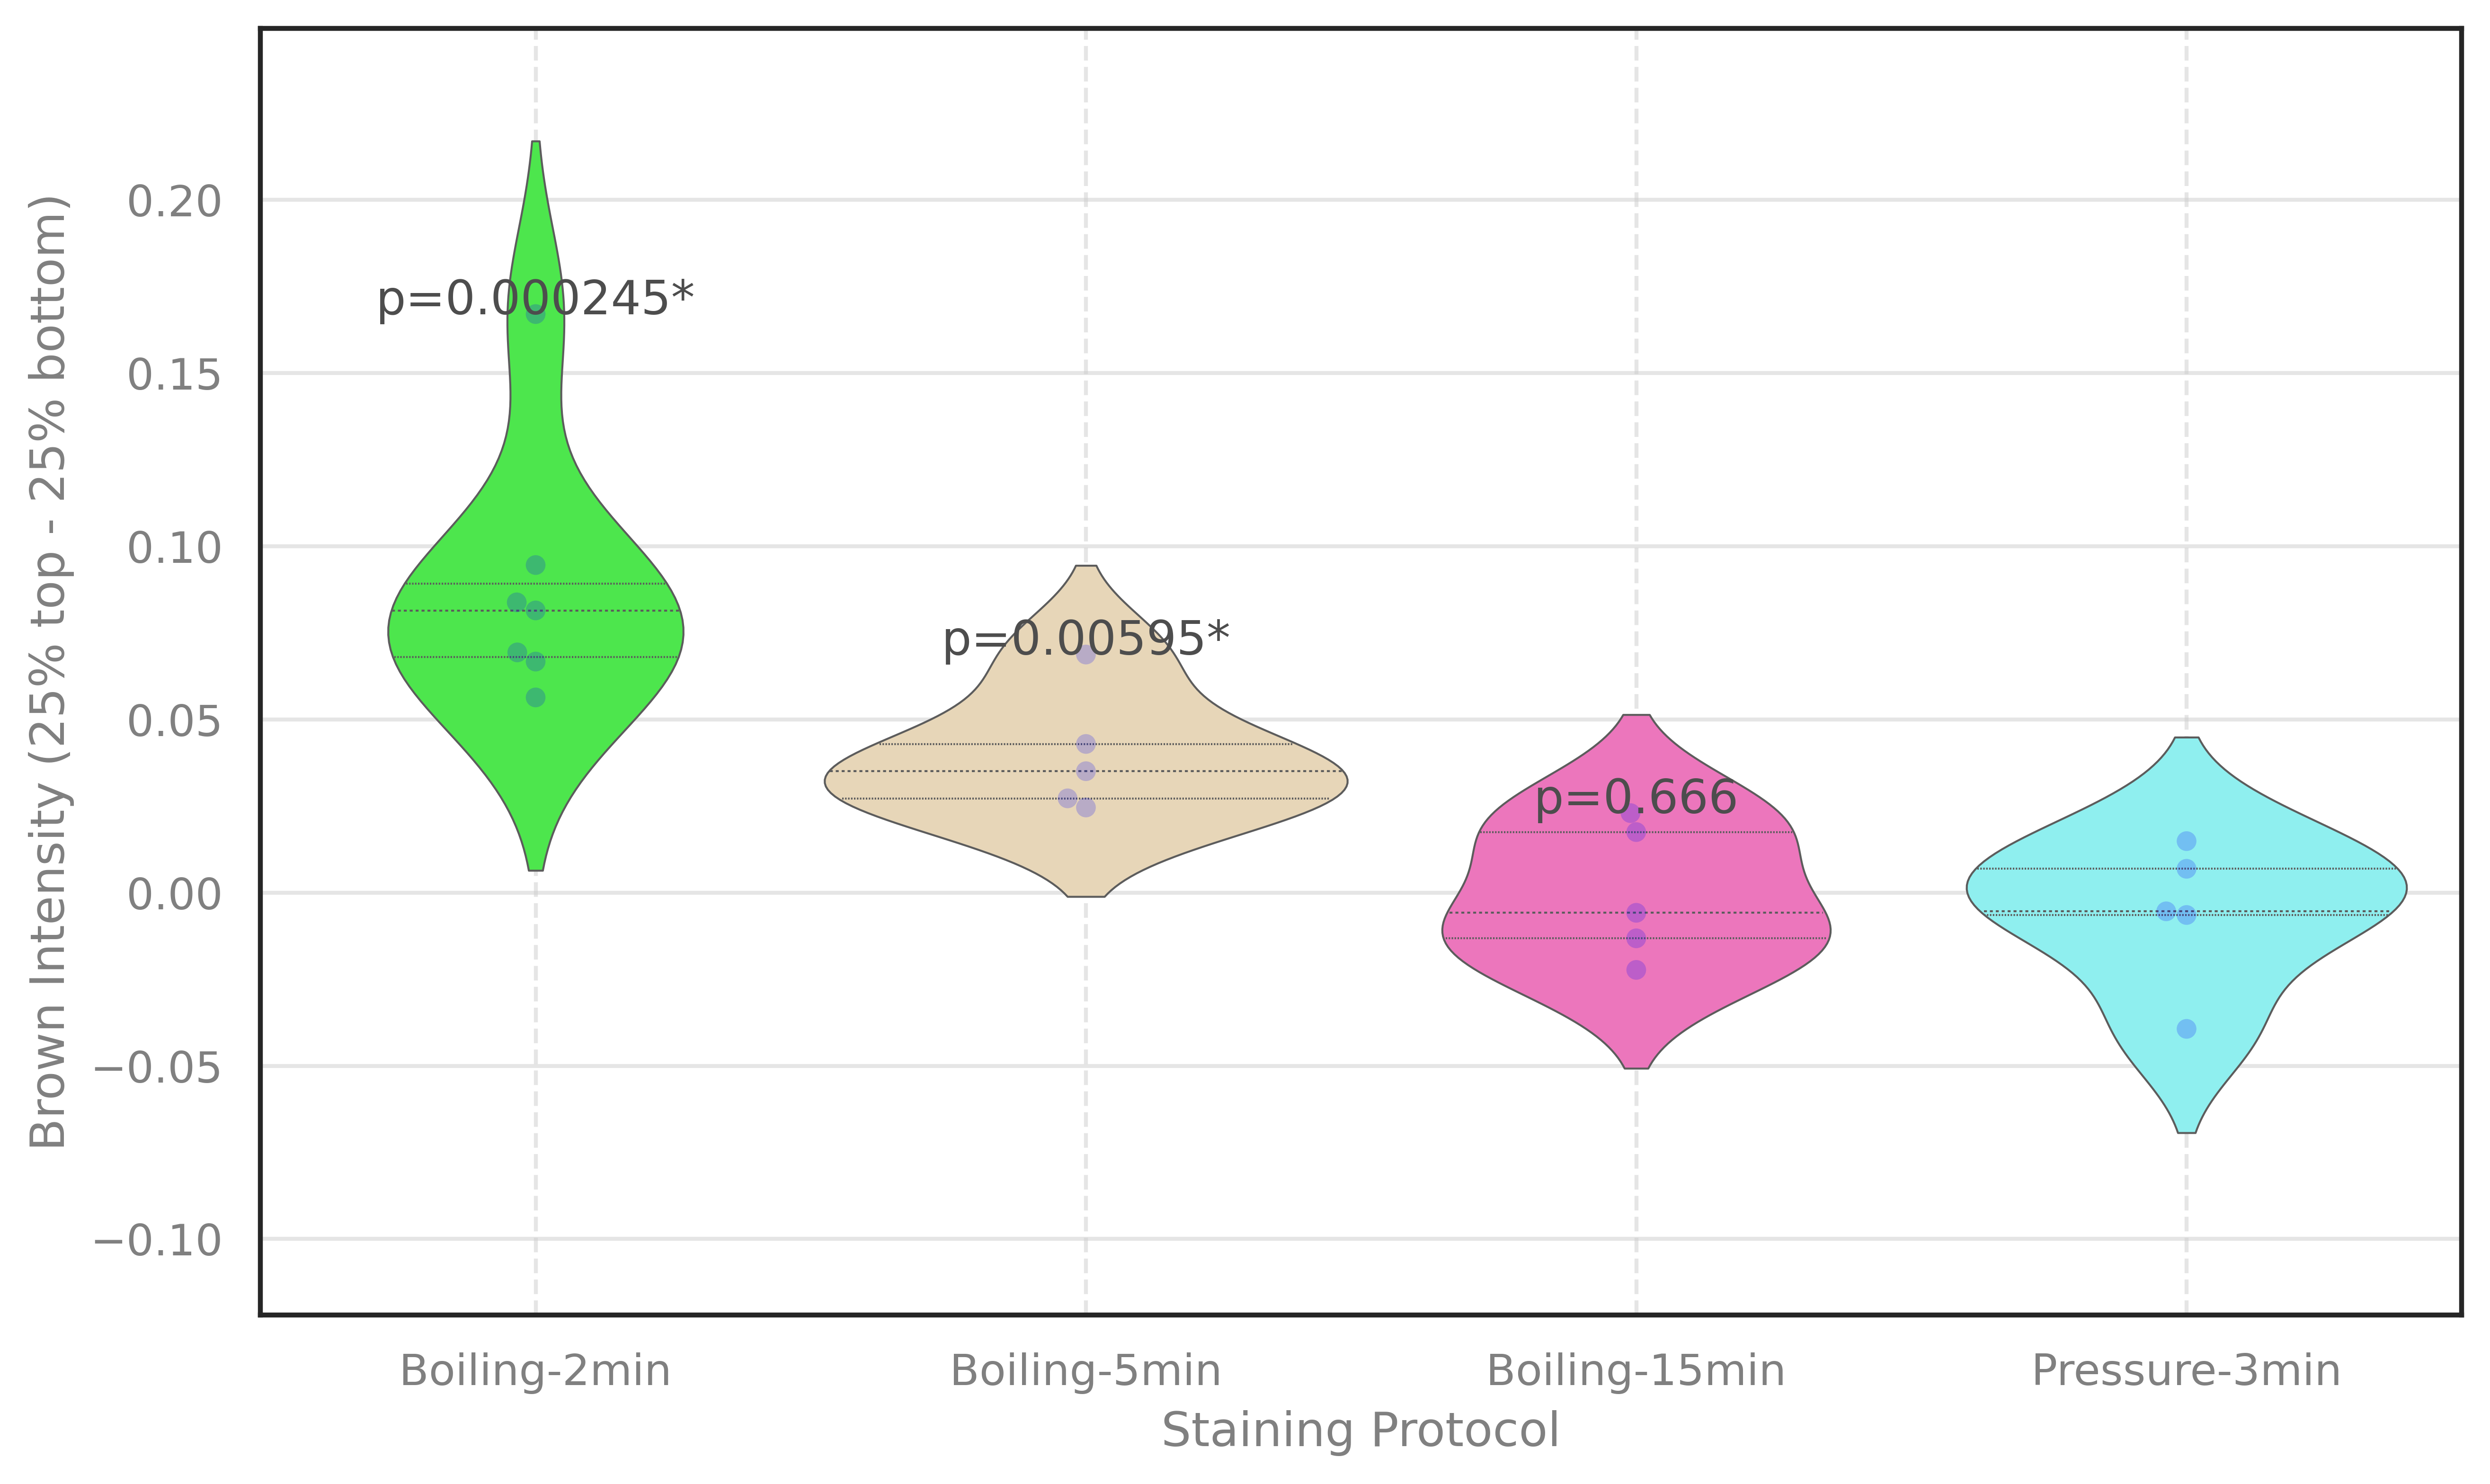

In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

acolor = ["#00CC00", "#D8A03D", "#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

def adj_light(color, l=1, s=1):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, l * c[1])), 
                 max(0, min(1, s * c[2])))

def plotViolin(data, atypes, params):
    df = pd.DataFrame()
    df['score'] = [k for i in range(len(data)) for k in data[i]]
    df['category'] = [atypes[i] for i in range(len(data)) for k in data[i]]
    print(df)
    # boiling_data = df[df['category'].str.contains('Boiling')]['score']
    # pressure_data = df[df['category'].str.contains('Pressure')]['score']
    # print(boiling_data)
    # print(pressure_data)

    pressure_data = df[df['category'] == 'Pressure-3min']['score']
    pvals_pressure_boiling = []  # Store p-values for annotation
  
    # t_stat, p_val = ttest_ind(boiling_data, pressure_data, equal_var=False)
    # m1 = []
    # pvals = []
    # for i in range(1, len(data)):
    #     if len(data[i]) <= 0:
    #         m1 += [0]
    #         pvals += [""]
    #         continue
    #     m1 += [max(data[i]) + (max(data[i]) - min(data[i])) * 0.1]
    #     t, p = ttest_ind(data[0],data[i], equal_var=False)
    #     if (p < 0.05):
    #         pvals += ["p=%.3g" % p]
    #     else:
    #         pvals += [""]
 # Perform t-test for 'Pressure-3min' against each boiling method
    for boiling_method in ['Boiling-2min', 'Boiling-5min', 'Boiling-15min']:
        boiling_data = df[df['category'] == boiling_method]['score']
        _, p_val = ttest_ind(pressure_data, boiling_data, equal_var=False, nan_policy='omit')  # Note the order of pressure_data and boiling_data
        pvals_pressure_boiling.append(p_val)

    dpi = 1200
    if 'dpi' in params:
        dpi = params['dpi']
    w, h = (1.5 * len(atypes), 4)
    if 'w' in params:
        w = params['w']
    if 'h' in params:
        h = params['h']
    color_sch1 = acolor
    if 'acolor' in params:
        color_sch1 = params['acolor']
    sns.set()
    sns.set_style("white")
    sns.set_style({'text.color': '.5', 
                   'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([adj_light(c, 1.5, 1) for c in color_sch1])
    
    fig, ax = plt.subplots(figsize=(w, h), dpi=dpi)
    width = 0.95
    if 'width' in params:
        width = params['width']

    # Automatically adjust y-axis limits
    buffer = 0.4  # Increase this factor if needed
    range_of_data = max(map(max, data)) - min(map(min, data))
    y_min = min(map(min, data)) - buffer * range_of_data
    y_max = max(map(max, data)) + buffer * range_of_data
    ax.set_ylim(y_min, y_max)

    # Create the violin plot
    ax = sns.violinplot(x="category", y="score", inner='quartile',
                        linewidth=0.5, width=width, ax=ax, data=df,
                        order=atypes)
    ax = sns.swarmplot(x="category", y="score", color='blue', alpha=0.2,
                       ax=ax, data=df, order=atypes)
    ax.set_xlabel("Staining Protocol")
    ax.set_ylabel('Brown Intensity (25% top - 25% bottom)')
    ax.yaxis.grid(True, linestyle='-', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)

    # Add p-value annotations
    # pos = range(len(atypes))
    # for tick, label in zip(pos[1:], ax.get_xticklabels()[1:]):
    #     ax.text(pos[tick], m1[tick - 1], pvals[tick - 1],
    #             horizontalalignment='center', size=12,
    #             color='0.3')
# Annotate the plot with the p-values from the t-tests
    for i, boiling_method in enumerate(['Boiling-2min', 'Boiling-5min', 'Boiling-15min']):
        # Determine the position for the annotation
        x_pos = i  # Modify this if your x-ticks are positioned differently
        y_pos = max(df[df['category'] == boiling_method]['score'])  # Position the annotation above the highest data point
        
        # Format the p-value text
        pval_text = f"p={pvals_pressure_boiling[i]:.3g}"
        if pvals_pressure_boiling[i] < 0.05:
            pval_text += '*'
        
        # Create the annotation on the plot
        plt.text(x_pos, y_pos, pval_text, horizontalalignment='center', size=12, color='0.3')

    ax.yaxis.grid(True, clip_on=False)
    output_filename = "plots/violin_plot.svg"
    plt.savefig(output_filename, format='svg', dpi=params.get('dpi', 600))
    print(f"Plot saved as {output_filename}")
    print(pvals_pressure_boiling)
    return ax


# Define the protocols you are interested in
selected_protocols = ['Boiling-2min', 'Boiling-5min', 'Boiling-15min', 'Pressure-3min']

# Filter the dataframe to only include the selected protocols
filtered_data = df[df['Staining Protocol'].isin(selected_protocols)]

# Data preparation for the plotViolin function
protocols = filtered_data['Staining Protocol'].unique()
brown_intensity_data = [filtered_data[filtered_data['Staining Protocol'] == protocol]['Brown Intensity(25% top - 25% bottom)'].tolist() for protocol in protocols]

# Parameters for the plotViolin function
params = {
    'dpi': 600,
    'w': 10,
    'h': 6,
    # 'acolor': sns.color_palette("hls", len(protocols))  # generating distinct colors for each protocol
}

# Calling the plotViolin function
plotViolin(brown_intensity_data, protocols, params)

# Mouse

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [11]:
df = pd.read_csv('dataset/Whole_Slides_Segments_Processed/Mouse/res_mouse.txt', sep='\s+', names=['Staining Protocol', 'size', 'bf50', 'be50', 'bf25', 'be25', 'rf50', 're50', 'rf25', 're25'], header=None, index_col=False)


In [12]:
df

,Staining Protocol,size,bf50,be50,bf25,be25,rf50,re50,rf25,re25
0,boiling,49,3.172749,4.711573,3.014441,5.326489,45.827246,43.691441,45.985553,43.229759
1,pressure,45,3.218605,3.989599,3.880954,5.261464,41.392595,41.010395,40.708465,39.738528


In [13]:
df.iloc[:, 1:] = df.iloc[:, 1:].div(df['size'].values, axis=0)

In [14]:
df['Brown Intensity(25% top - 25% bottom)'] = df['rf25'] - df['re25']

In [15]:
df

,Staining Protocol,size,bf50,be50,bf25,be25,rf50,re50,rf25,re25,Brown Intensity(25% top - 25% bottom)
0,boiling,1.0,0.064750,0.096155,0.061519,0.108704,0.935250,0.891662,0.938481,0.882240,0.056241
1,pressure,1.0,0.071525,0.088658,0.086243,0.116921,0.919835,0.911342,0.904633,0.883078,0.021554


In [16]:
import pandas as pd
import io

df = pd.read_csv("dataset/Whole_Slides_Segments_Processed/Mouse/per_image_brown_intensity.tsv", sep='\t')


df = df.drop('image_path', axis=1)


df = df.rename(columns={'protocol': 'Staining Protocol'})


In [17]:
pd.set_option('display.max_rows', None)
df.head(100)

,Staining Protocol,Brown Intensity(25% top - 25% bottom)
0,boiling,0.023400
1,boiling,0.008668
2,boiling,0.006223
3,boiling,0.524906
4,boiling,0.013854
5,boiling,-0.093735
6,boiling,-0.000340
7,boiling,-0.503786
8,boiling,0.000000
9,boiling,-0.017340


In [18]:
rows_to_drop = [7,11,51,54]
df= df.drop(rows_to_drop)

       score  category
0   0.023400   boiling
1   0.008668   boiling
2   0.006223   boiling
3   0.524906   boiling
4   0.013854   boiling
5  -0.093735   boiling
6  -0.000340   boiling
7   0.000000   boiling
8  -0.017340   boiling
9   0.008614   boiling
10  0.510571   boiling
11  0.352315   boiling
12 -0.074942   boiling
13 -0.000340   boiling
14  0.017336   boiling
15 -0.093586   boiling
16  0.000000   boiling
17  0.000000   boiling
18 -0.013751   boiling
19  0.011461   boiling
20  0.000053   boiling
21 -0.002494   boiling
22 -0.072538   boiling
23 -0.008169   boiling
24  0.000000   boiling
25  0.010652   boiling
26  0.011241   boiling
27  0.000000   boiling
28 -0.017340   boiling
29  0.423851   boiling
30  0.000000   boiling
31  0.006875   boiling
32  0.016963   boiling
33 -0.002494   boiling
34  0.206833   boiling
35  0.039252   boiling
36  0.187917   boiling
37 -0.004403  pressure
38 -0.000022  pressure
39  0.000016  pressure
40  0.000300  pressure
41  0.000000  pressure
42 -0.02628

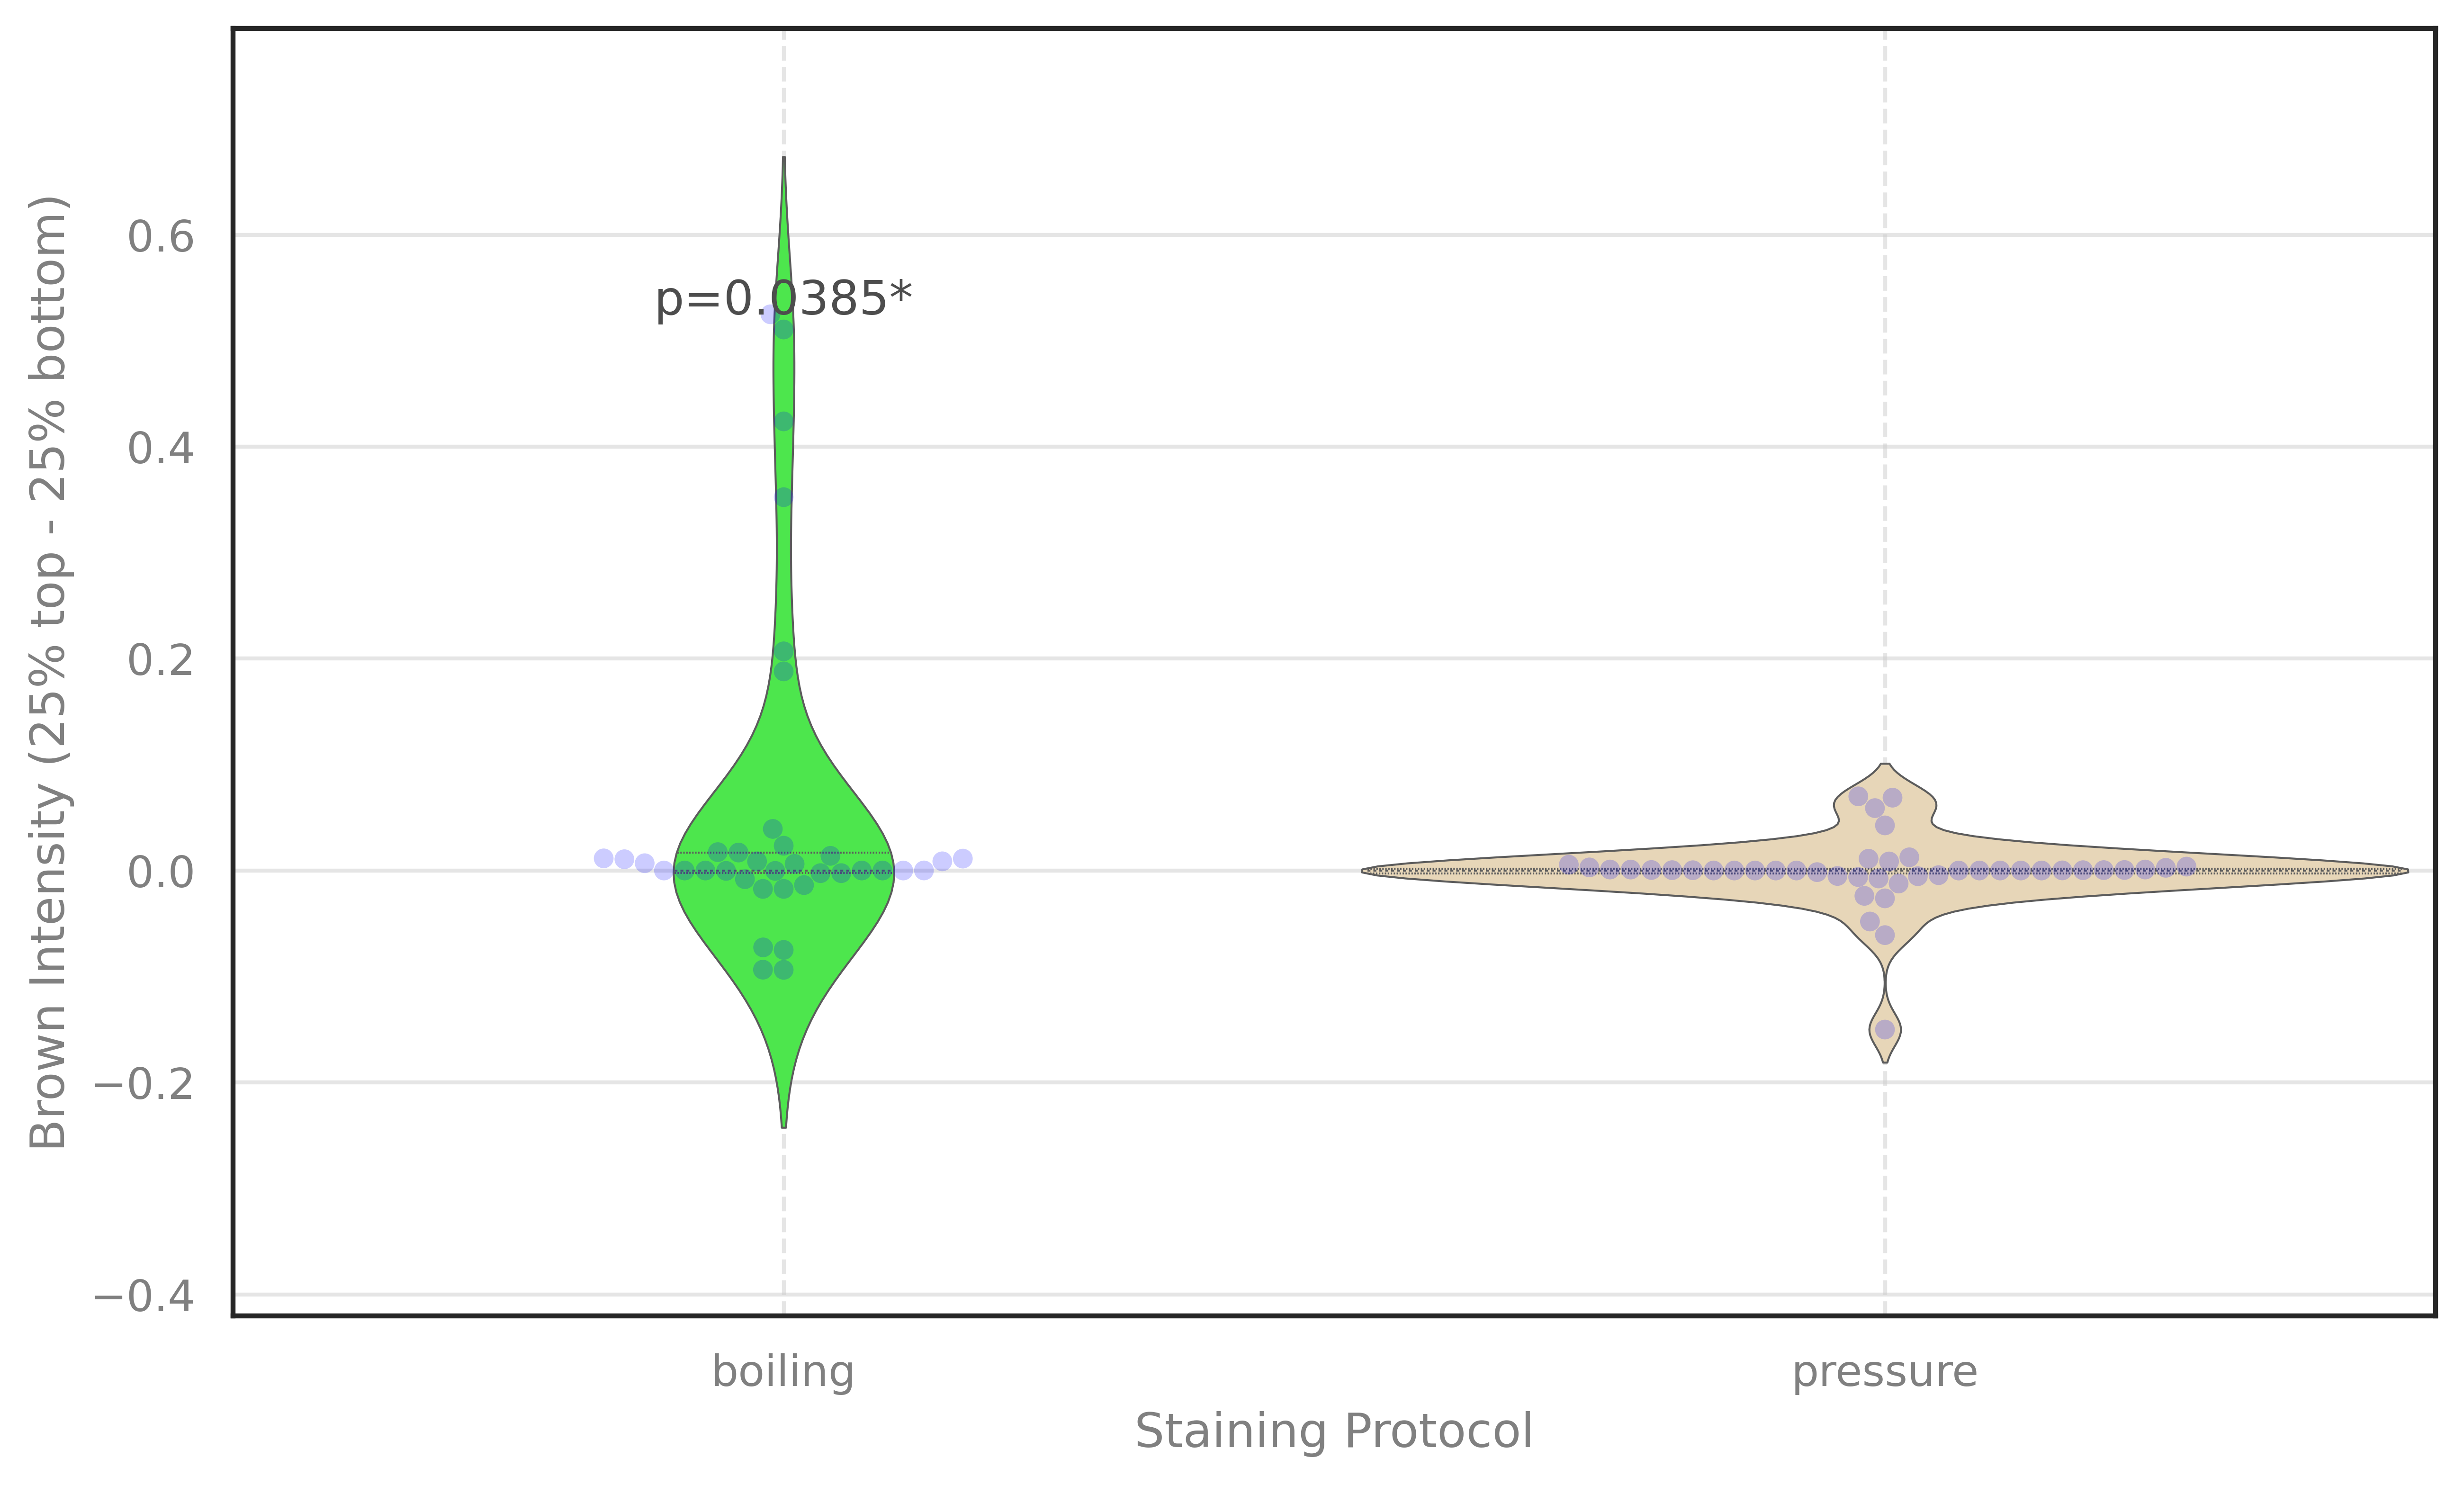

In [20]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

acolor = ["#00CC00", "#D8A03D", "#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

def adj_light(color, l=1, s=1):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, l * c[1])), 
                 max(0, min(1, s * c[2])))

def plotViolin(data, atypes, params):
    df = pd.DataFrame()
    df['score'] = [k for i in range(len(data)) for k in data[i]]
    df['category'] = [atypes[i] for i in range(len(data)) for k in data[i]]
    print(df)
    # boiling_data = df[df['category'].str.contains('Boiling')]['score']
    # pressure_data = df[df['category'].str.contains('Pressure')]['score']
    # print(boiling_data)
    # print(pressure_data)

    pressure_data = df[df['category'] == 'pressure']['score']
    pvals_pressure_boiling = []  # Store p-values for annotation
  
    # t_stat, p_val = ttest_ind(boiling_data, pressure_data, equal_var=False)
    # m1 = []
    # pvals = []
    # for i in range(1, len(data)):
    #     if len(data[i]) <= 0:
    #         m1 += [0]
    #         pvals += [""]
    #         continue
    #     m1 += [max(data[i]) + (max(data[i]) - min(data[i])) * 0.1]
    #     t, p = ttest_ind(data[0],data[i], equal_var=False)
    #     if (p < 0.05):
    #         pvals += ["p=%.3g" % p]
    #     else:
    #         pvals += [""]
 # Perform t-test for 'Pressure-3min' against each boiling method
    for boiling_method in ['boiling']:
        boiling_data = df[df['category'] == boiling_method]['score']
        _, p_val = ttest_ind(pressure_data, boiling_data, equal_var=False, nan_policy='omit')  # Note the order of pressure_data and boiling_data
        pvals_pressure_boiling.append(p_val)

    dpi = 1200
    if 'dpi' in params:
        dpi = params['dpi']
    w, h = (1.5 * len(atypes), 4)
    if 'w' in params:
        w = params['w']
    if 'h' in params:
        h = params['h']
    color_sch1 = acolor
    if 'acolor' in params:
        color_sch1 = params['acolor']
    sns.set()
    sns.set_style("white")
    sns.set_style({'text.color': '.5', 
                   'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([adj_light(c, 1.5, 1) for c in color_sch1])
    
    fig, ax = plt.subplots(figsize=(w, h), dpi=dpi)
    width = 0.95
    if 'width' in params:
        width = params['width']

    # Automatically adjust y-axis limits
    buffer = 0.4  # Increase this factor if needed
    range_of_data = max(map(max, data)) - min(map(min, data))
    y_min = min(map(min, data)) - buffer * range_of_data
    y_max = max(map(max, data)) + buffer * range_of_data
    ax.set_ylim(y_min, y_max)

    # Create the violin plot
    ax = sns.violinplot(x="category", y="score", inner='quartile',
                        linewidth=0.5, width=width, ax=ax, data=df,
                        order=atypes)
    ax = sns.swarmplot(x="category", y="score", color='blue', alpha=0.2,
                       ax=ax, data=df, order=atypes)
    ax.set_xlabel("Staining Protocol")
    ax.set_ylabel('Brown Intensity (25% top - 25% bottom)')
    ax.yaxis.grid(True, linestyle='-', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)

    # Add p-value annotations
    # pos = range(len(atypes))
    # for tick, label in zip(pos[1:], ax.get_xticklabels()[1:]):
    #     ax.text(pos[tick], m1[tick - 1], pvals[tick - 1],
    #             horizontalalignment='center', size=12,
    #             color='0.3')
# Annotate the plot with the p-values from the t-tests
    for i, boiling_method in enumerate(['boiling']):
        # Determine the position for the annotation
        x_pos = i  # Modify this if your x-ticks are positioned differently
        y_pos = max(df[df['category'] == boiling_method]['score'])  # Position the annotation above the highest data point
        
        # Format the p-value text
        pval_text = f"p={pvals_pressure_boiling[i]:.3g}"
        if pvals_pressure_boiling[i] < 0.05:
            pval_text += '*'
        
        # Create the annotation on the plot
        plt.text(x_pos, y_pos, pval_text, horizontalalignment='center', size=12, color='0.3')

    ax.yaxis.grid(True, clip_on=False)
    output_filename = "plots/mouse_pvalue.svg"
    plt.savefig(output_filename, format='svg', dpi=params.get('dpi', 600))
    print(f"Plot saved as {output_filename}")
    print(pvals_pressure_boiling)
    return ax


# Define the protocols you are interested in
selected_protocols = ['boiling', 'pressure']

# Filter the dataframe to only include the selected protocols
filtered_data = df[df['Staining Protocol'].isin(selected_protocols)]

# Data preparation for the plotViolin function
protocols = filtered_data['Staining Protocol'].unique()
brown_intensity_data = [filtered_data[filtered_data['Staining Protocol'] == protocol]['Brown Intensity(25% top - 25% bottom)'].tolist() for protocol in protocols]

# Parameters for the plotViolin function
params = {
    'dpi': 600,
    'w': 10,
    'h': 6,
    # 'acolor': sns.color_palette("hls", len(protocols))  # generating distinct colors for each protocol
}

# Calling the plotViolin function
plotViolin(brown_intensity_data, protocols, params)